<a href="https://colab.research.google.com/github/ByeongDoo-Han/Analysis/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B5%90%EA%B3%BC%EC%84%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# 4.1 누락된 데이터 다루기

# 4장 주요 내용
- 인터넷에서 누락된 값을 제거하거나 대체하기
- 머신러닝 알고리금을 위해 범주형 데이터 변환하기
- 모델과 관련이 높은 특성 선택하기


In [ ]:
# StringIO를 이용해서 NaN값이 포함된 데이터 프레임 생성
csv_data =\
 '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# NaN값이 하나라도 있는 행 제거
display(df.dropna(axis = 0))
# 값이 모두 NaN인 행 제거
display(df.dropna(how = 'all'))
# 실수 값이 네 개보다 작은 행을 삭제
display(df.dropna(thresh = 4))
# 특정 열에 NaN이 있는 행만 삭제(여기서는 'C'열)
display(df.dropna(subset = ['C']))

,A,B,C,D
0,1.0,2.0,3.0,4.0


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


,A,B,C,D
0,1.0,2.0,3.0,4.0


,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [ ]:
# SImpleImputer를 이용한 데이터 전처리
# SimpleImputer는 행을 기준으로 계산하기 때문에 열을 기준으로 값을 계산하기위해선 FunctionTransformer를 이용해야함
simr = SimpleImputer(missing_values=np.nan, strategy='mean') #nan값을 데이터의 mean값으로 대체
simr = simr.fit(df.values)
imputed_data = simr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [ ]:
# 열을 기준으로 데이터의 평균값으로 NaN값 대체
fit_simr = FunctionTransformer(lambda X: simr.fit_transform(X.T).T, validate = False)
imputed_data = fit_simr.fit_transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

# 범주형 데이터 다루기

In [ ]:
# 데이터 생성
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red','L',13.5, 'class2'],
                   ['blue','XL',15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [ ]:
# 순서 특성 매핑
# 범주형 데이터에서 데이터의 순서를 알고리즘에 입력하기위해 매핑 작업을 해준다. (사이킷런 에서는 아직 특성의 순서를 자동으로 바꿔주는 기능이 없음)
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


# 클래스 레이블 인코딩
- 사이킷런의 분류기 알고리즘은 대부분 클래스 레이블을 자동으로 정수로 변환해주지만 사소한 실수를 방지하기 위해 직접 바꿔주는것이 좋음

In [ ]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [ ]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [ ]:
# 다른방법으로 사이킷런에 구현된 LabelEncoder를 사용하면 편리하다
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y
# LabelEncoder 전으로 돌아가고 싶으면 다음을 실행하면 된다.
#class_le.inverse_transform(y)

array([0, 1, 0])

## 순서가 없는 특성에 One-Hot Encoding 적용

In [ ]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X
# blue = 0, green = 1, red = 2

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

- LabelEncoder는 타깃 레이블을 인코딩하기 위한 클래스이므로 입력 데이터로 1차원 배열을 기대한다.
- 데이터셋에 변경해야 할 열이 많다면 동일한 작업을반복해야 하므로 번거롭다. 사이킷런 에서는 범주형 데이터를 정수로 인코딩하는 OrdinalEncoder와 판다스 데이터프레임의 열마다 다른 변환을 적용하도록 도와주는 ColumnTransformer가 추가되었다. 이 두 클래스를 이용하면 여러 개의 열을 한 번에 변환할 수 있다.

- 여기서 주의할 점은 OrdinalEncoder는 순서가 없는 범주형 특성을 정수로 변환하는 클래스이다

In [ ]:
ord_enc = OrdinalEncoder(dtype=np.int)
col_trans = ColumnTransformer([('ord_enc', ord_enc,['color'])])
# ColumnTransformer는 첫 번째 매개변수로 트랜스포머(transformer)의 리스트를 받는다. 트랜스포머는 이름, 변환기, 변환할 리스트로 이루어진 튜플이다.
# 여기서 이름은 ord_enc, 변환기는 OrdinalEncoder, 변환할 열은 color 하나를 지정했다.
# 결과에서 알 수 있듯 color 열이 정수 값으로 변환되었다.
X_trans = col_trans.fit_transform(df)
X_trans

array([[1],
       [2],
       [0]])

In [ ]:
# 위 코드에서 LabelEncoding을 진행 했을때, color값에 대소구분이 생길 수 있다.
# 이러한 문제를 해결하기위해 원핫인코딩을 진행한다.
# 순서 없는 특성에 들어 있는 고유값마다 새로운 더미(dummy) 특성을 만드는 것이다.
ohe = OneHotEncoder(categories='auto')
col_trans = ColumnTransformer([('ohe',ohe,[0])], remainder='passthrough')
col_trans.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [ ]:
# 원-핫 인코딩을 더미 변수를 만드는 더 편리한 방법은 판다스의 get_dummies 메서드를 사용하는 것이다.
# get_dummies는 문자열만 반환하고 나머지 열은 그대로 둔다.
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


- 원-핫 인코딩된 데이터셋을 사용할 때 **다중 공선성** 문제를 유념해야 한다.
- 특성 간의 상관관계가 높으면 역행렬을 계산하기 어려워 수치적으로 불안정해진다. 변수 간의 상관관계를 감소하려면 원-핫 인코딩된 배열에서 특성 열 하나를 삭제한다.
- 이렇게 특성을 삭제해도 잃는 정보는 없다.
- 예를 들어 color_blue 열을 삭제해도 샘플이 color_green = 0 이고 color_red = 0 일 떄 blue임을 알 수 있다.

In [ ]:
# get_dummies를 사용할 때 drop_first 매개변수를 True로 지정하여 첫 번째 열을 삭제할 수 있다.
pd.get_dummies(df[['price','color','size']], drop_first = True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [ ]:
# OneHotEncoder는 열을 삭제하는 매개변수가 없으므로, array를 슬라이싱 해야한다.
ohe = OneHotEncoder(categories='auto')
ohe.fit_transform(X).toarray()[:, 1:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Train set , Test set 나누기

In [ ]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [ ]:
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0, stratify = y)
# train과 test set의 비율을 7:3으로 맞췄고, stratify = y로 하면 train과 test의 label 비율을 동일하게 나눠줌

### 특성 스케일 맞추기
- 두개의 특성에서 첫번째 특성이 [1,10]사이의 값이고, 두번째 특성이 [1,10만] 사이의 값일때 아달린은 큰 오차에 맞추어 가중치를 최적화 할것이고, knn은 샘플간의 거리를 계산하므로 두번째 특성 축에 좌우 될것이다.

- 이러한 문제를 해결하고자 특성 스케일을 맞추는데 대표적으로 정규화(Normalization)와 표준화(Standardization)이 있다.

- 대부분 정규화는 특성의 스케일을 [0,1]범위에 맞추는 것을 의미한다.
- MinMaxScaler는 데이터셋에 비정상적으로 아주 큰 값이나 아주 작은 값이 들어 있을 때 다른 샘플들을 좁은 구간에 촘촘하게 모으게 만든다.
- 최소-최대 스케일 변환(min-max scaling)은 다음과 같이 진행된다

In [ ]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
# MinMaxScaler를 통한 정규화는 범위가 정해진 값이 필요할 때 유용하게 사용할 수 있는 일반적인 기법이다.

- 표준화를 사용하면 특성의 평균을 0에 맞추고 표준편차를 1로 만들어 정규 분포와 같은 특징을 가지도록 만든다. 이는 가중치를 더 쉽게 학습할 수 있도록 만든다.
- 표준화는 이상치 정보가 유지되기 때문에 제한된 범위로 데이터를 조정하는 MinMaxScale변환에 비해 알고리즘이 이상치에 덜 민감하다.
- 표준화와 정규화는 아래와 같이 진행한다.

In [ ]:
ex = np.array([0,1,2,3,4,5])
print('표준화:', (ex - ex.mean())/(ex.std()))
print('정규화:', (ex - ex.min())/(ex.max() - ex.min() ))

표준화: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화: [0.  0.2 0.4 0.6 0.8 1. ]


- MinMaxScaler와 비슷한 표준화를 위한 클래스도 제공한다.

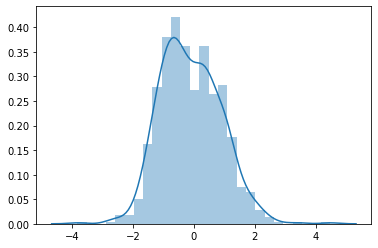

In [ ]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
sns.distplot(X_test_std)

# 유용한 특성 선택
- 모델이 test set보다 train set에서 성능이 높다면 Overfitting에 대한 강력한 신호이다.

- 과대적합의 이유는 주어진 훈련 데이터에 비해 모댈이 너무 복잡하기 때문이다. 일반화 오차를 감소시키기 위해 많이 사용하는 방법은 다음과 같다.
-- 더 많은 훈련 데이터를 모은다
-- 규제를 통해  모델 복잡도를 제한한다.
-- 파라미터 개수가 적은 간단한 모델을 선택한다.
-- 데이터 차원을 줄인다.

- 이번에는 모델 복잡도 제한을 위해 L1규제와 L2 규제를 알아보도록 한다.
자세한 내용은 https://kolikim.tistory.com/50 를 참고한다

In [ ]:
# 사이킷런에서 L1 규제를 지원하는 모델은 Penalty 매개변수를 'l1'으로 지정하여 희소한 모델을 만들 수 있다.
# LogisticRegression 클래스의 solver 중 lbfgs, newton-cg, sag는 L2 규제만 지원한다. saga, liblinear는 L1, L2 규제를 모두 지원한다.
lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', penalty='l1', C = 1.0, random_state= 42)
lr.fit(X_train_std, y_train)
print('훈련 정확도:', lr.score(X_train_std, y_train))
print('테스트 정확도:', lr.score(X_test_std, y_test))

훈련 정확도: 1.0
테스트 정확도: 1.0


In [ ]:
# 절편을 확인해보기 위해 intercept로 세 개의 값이 들어있는 배열을 확인
# 첫 번째 절편은 클래스 1을 클래스 2,3과 구분하는 모델의 절편
# 두 번째 절편은 클래스 2를 클래스 1,3과 구분하는 모델의 절편
# 세 번째 절편은 클래스 3을 클래스 1,2와 구분하는 모델의 절편
lr.intercept_

array([-1.26341605, -1.21598985, -2.3701943 ])

In [ ]:
# coef 속성에 있는 가중치는 클래스마다 벡터 하나씩 세 새의 행이 있는 가중치 배열이다.
# 각 행은 13개의 가중치를 갖는다. 각 가중치와 13차원의 Wine데이터셋의 특성을 곱해 최종입력을 계산한다.
lr.coef_

array([[ 1.24579421,  0.18061164,  0.74359352, -1.16112462,  0.        ,
         0.        ,  1.16957619,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54788874,  2.51037422],
       [-1.53699942, -0.38746609, -0.99525191,  0.36498543, -0.05970899,
         0.        ,  0.6678873 ,  0.        ,  0.        , -1.93417045,
         1.23366592,  0.        , -2.23177895],
       [ 0.13562632,  0.16843221,  0.3572171 ,  0.        ,  0.        ,
         0.        , -2.43829335,  0.        ,  0.        ,  1.56374546,
        -0.81900707, -0.49232727,  0.        ]])

- L1 규제는 결과적으로 데이터셋에 관련이 적은 특성이 있더라도 견고한 모델을 만들어준다.
- 앞 예제에서 가중치 벡터는 0이 아닌 원소가 많기 때문에 꼭 희소하지 않다. 규제 강도를 높여 희소성을 더 강하게 할 수 있다(0인 원소가 더 많아짐) 즉 C값을 낮추는것


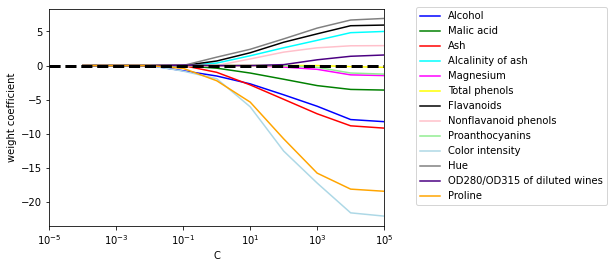

In [ ]:
# 규제 강도를 달리하여 특성의 가중치 변화를 그래프로 그려보자
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4.,6.):
  lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', penalty='l1', C = 10.**c, random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:,column],
           label = df_wine.columns[column+1],
           color = color)
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc = 'upper left')
ax.legend(loc = 'upper center', bbox_to_anchor = (1.38, 1.03), ncol = 1, fancybox = True)

 - 위 그림에서 확인할 수 있듯이 강한 규제 파라미터(C<0.1)로 모델을 제약하면 모든 가중치가 0이 된다

# 순차 특성 선택 알고리즘
- 모델 복잡도를 줄이고 과대적합을 피하는 다른 방법은 특성 선택을 통한 **차원 축소(Demensionality reduction)**이다. 규제가 없는모델에서 특히 유용하다,
- 차원 축소 기법에는 두 개의 주요 카테고리인 **특성 선택(Feature selection)**과 **특성 추출(Feature extraction)**이 있다.

- 지금부터 전통적인 특성 선택 알고리즘을 살펴보자
- 순차 특성 선택 알고리즘은 탐욕적 탐색 알고리즘(greedy search algorithm)으로 초기 d 차원의 특성 공간을 k < d인 k 차원의 특성 부분 공간으로 축소한다. 특성 선택 알고리즘은 주어진 문제에 가장 관련이 높은 특성 부분 집합을 자동으로 선택하는 것이 목적이다.

- 즉 관계없는 특성이나 잡음을 제거하여 계산 효율성을 높이고 모델의 일반화 오차를 줄인다. **규제를 제공하지 않는 알고리즘**을 사용할 때 유용하다

- 전통적인 순차 특성 선택 알고리즘은 순차 후진 선택(Sequentail Backward Selection, SBS)이다.
- 계산 효율성을 향상하기 위해 모델 성능을 가능한 적게 희생하면서 초기 특성의 부분공간으로 차원을 축소한다. 과대적합의 문제를 안고 있는 모델이라면 SBS가 예측 성능을 높일 수도 있을것이다.
- SBS의 아이디어는 매우 간단하다. 새로운 특성의 부분 공간이 목표하는 특성 개수가 될 때까지 전체 특성에서 순차적으로 특성을 제거한다. 쉽게 말하면 각 단계에서 제거했을 때 성능 손실이 최대가 되는 특성을 제거한다.
- SBS의 4단계는 여기선 생략한다.

In [ ]:
# SBS는 시이킷런에 구현되어있지 않다. 그러므로 직접 작성한다
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [ ]:
# SBS 알고리즘이 잘 작동하는지 KNN을 이용해 확인해보자

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

- SBS의 fit 메서드에서 데이터셋을 train, test 로 나누지만 train set만 넣어 score를 계산한다
- SBS의 fit 메서드는 훈련과 테스트(검증)를 위한 새로운 부분 세트를 만든다. 여기서 test set를 **검증 세트(validation set)**라고도 부른다.

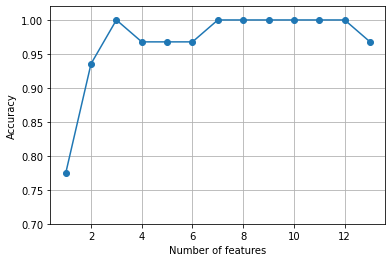

In [ ]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
# 아래 그림에서 볼 수 있듯이 특성 개수가 줄었을 때 검증 세트에서 KNN분류기이 정확도가 향상되었다.
# 차원의 저주가 감소하기 때문임

In [ ]:
# 가장 작은 개수의 조합(k=3)에서 높은 검증 세트 성능을 내는 특성이 어떤 것인지 확인해보자
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])


Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [ ]:
# 특성 추출을 하지 않았을 때 KNN의 성능을 확인해보자
knn.fit(X_train_std, y_train)
print('훈련 정확도:', knn.score(X_train_std, y_train))
print('테스트 정확도:', knn.score(X_test_std, y_test))

훈련 정확도: 0.967741935483871
테스트 정확도: 0.9629629629629629


In [ ]:
# 선택된 세 개의 특성에서 KNN 성능을 확인해보자
knn.fit(X_train_std[:,k3], y_train)
print('훈련 정확도:', knn.score(X_train_std[:,k3], y_train))
print('테스트 정확도:', knn.score(X_test_std[:,k3], y_test))

훈련 정확도: 0.9516129032258065
테스트 정확도: 0.9259259259259259


- Wine 데이터셋에 있는 원본 특성의 1/4보다 적은 특성을 사용했지만 테스트 세트의 예측 정확도는 조금만 감소하였다. 이 세 개의 특성에 담긴 판별 정보가 원래 데이터셋보다 적지 않다는뜻이다.
- WIne 데이터셋은 작은 데이터셋이라는 점을 유념해야한다. 무작위성에 매우 민감하다. 즉, 데이터셋을 훈련 세트와 테스트 세트로 나눈 것과 다시 훈련 세트와 검증세트로 나누는 방식에 영향을 받는다.
- 특성 개수를 줄여서 KNN 모델의 성능이 증가하지는 않았지만 데이터셋 크기를 줄였다. 데이터 수집 비용이 높은 실전 애플리케이션에서는 유용할 수 있다. 또한 특성 개수를 크게 줄였기 때문에 더 간단한 모델을 얻었고 해석하기도 쉽다.

# 랜덤 포레스트의 Feature Importance
- 트리기반의 앙상블 모델에선 보통 변수 중요도를 제공해준다.
- 트리기반 모델은 표준화나 정규화를 할 필요가 없다는 것을 꼭 기억하자

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


(-1.0, 13.0)

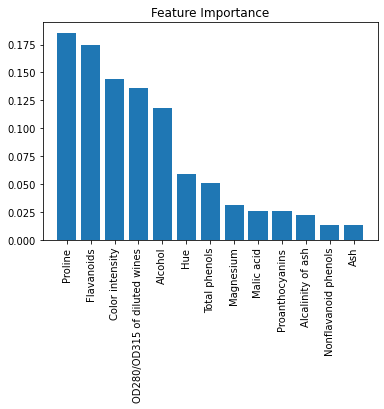

In [ ]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

- 모델 해석을 중요하게 고려한다면 랜덤 포레스트 기법에서 언급할 만한 중요한 참고 사항이 있다.
-- 두 개 이상의 특성이 매우 상관관계가 높다면 하나의 특성은 매우 높은 순위를 갖지만 다른 특성 정보는 완전히 잡아내지 못할 수 있다.
-- 특성 중요도 값을 해석하는 것보다 모델의 예측 성능에만 관심이 있다면 이 문제를 신경 쓸 필요는 없다.


In [ ]:
# SelecFromModel에 관해 살펴보자.
# 이 클래스는 모델 훈련이 끝난 후 사용자가 지정한 임계 값을 기반으로 특성을 선택한다.
# Pipeline의 중간 단께에서 RandomForestClassifier를 특성 선택기로 사용할 때 유용하다.
# 다음 코드에선 임계 값을 0.1로 하여 가장 중요한 다섯 개의 특성으로 데이터셋을 줄였다.
sfm = SelectFromModel(forest, threshold = 0.1, prefit = True)
X_selected = sfm.transform(X_train)
print('임계 조건을 만족하는 샘플의 수:', X_selected.shape[1])

임계 조건을 만족하는 샘플의 수: 5


In [ ]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
